In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df=pd.read_csv("C:/Users/Administrator/Desktop/Addiction/teen_phone_addiction_dataset.csv")
df.head(3)

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [15]:
df.isna().sum()

ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

In [16]:
usage_bins = [0, 2, 4, 6, 8, 10, df['Daily_Usage_Hours'].max()]
usage_labels = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs', '10+ hrs']

df['Usage_Category'] = pd.cut(df['Daily_Usage_Hours'], bins=usage_bins, labels=usage_labels, include_lowest=True)

anxiety_by_usage = df.groupby('Usage_Category', observed=True)['Anxiety_Level'].mean().reset_index()
print(anxiety_by_usage)

  Usage_Category  Anxiety_Level
0        0–2 hrs       5.435233
1        2–4 hrs       5.586445
2        4–6 hrs       5.684075
3        6–8 hrs       5.520833
4       8–10 hrs       5.511236
5        10+ hrs       4.833333


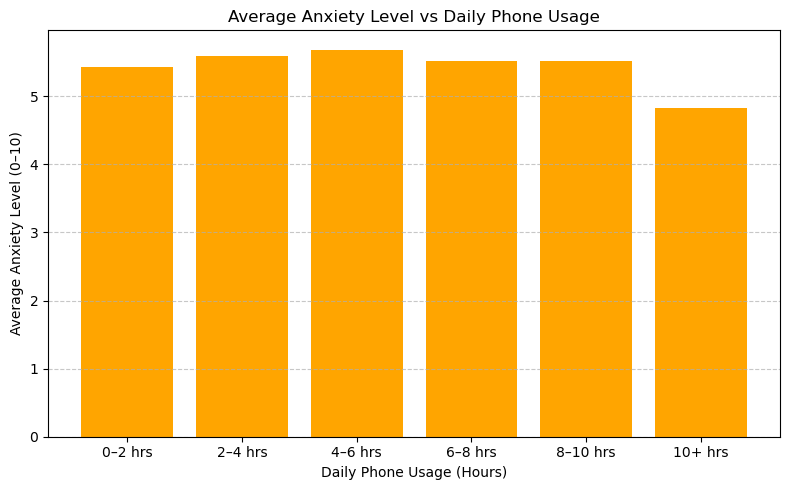

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(anxiety_by_usage['Usage_Category'], anxiety_by_usage['Anxiety_Level'], color='orange')
plt.title('Average Anxiety Level vs Daily Phone Usage')
plt.xlabel('Daily Phone Usage (Hours)')
plt.ylabel('Average Anxiety Level (0–10)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
min_depression = df['Depression_Level'].min()
max_depression = df['Depression_Level'].max()

print(f"Minimum Depression Level: {min_depression}")
print(f"Maximum Depression Level: {max_depression}")

Minimum Depression Level: 1
Maximum Depression Level: 10


In [19]:
high_depression_threshold = 7  # Adjust as per scale (assume 0-10)
usage_threshold = 5

high_dep_high_usage = df[(df['Depression_Level'] >= high_depression_threshold) &
                         (df['Daily_Usage_Hours'] > usage_threshold)]

percentage = (len(high_dep_high_usage) / len(df)) * 100
print(f"% of Students with High Depression & >5 hrs Usage: {percentage:.2f}%")

% of Students with High Depression & >5 hrs Usage: 19.03%


In [20]:
usage_bins = [0, 2, 4, 6, 8, 10, df['Daily_Usage_Hours'].max()]
usage_labels = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs', '10+ hrs']

df['Usage_Category'] = pd.cut(df['Daily_Usage_Hours'], bins=usage_bins, labels=usage_labels, include_lowest=True)

avg_depression_by_category = df.groupby('Usage_Category', observed=True)['Depression_Level'].mean().reset_index()
print(avg_depression_by_category)

  Usage_Category  Depression_Level
0        0–2 hrs          5.699482
1        2–4 hrs          5.352697
2        4–6 hrs          5.460616
3        6–8 hrs          5.484722
4       8–10 hrs          5.432584
5        10+ hrs          6.500000


In [21]:
min_anxiety = df['Anxiety_Level'].min()
max_anxiety = df['Anxiety_Level'].max()

print(f"Minimum Anxiety Level: {min_anxiety}")
print(f"Maximum Anxiety Level: {max_anxiety}")

Minimum Anxiety Level: 1
Maximum Anxiety Level: 10


In [22]:
sleep_deprived = df[df['Sleep_Hours'] < 6]
sleep_deprivation_rate = (len(sleep_deprived) / len(df)) * 100
print(f"Sleep Deprivation Rate: {sleep_deprivation_rate:.2f}%")
#We can see more than one-third of children are sleep deprived.

Sleep Deprivation Rate: 36.30%


In [23]:
sleep_threshold = 6

df['Sleep_Deprived'] = df['Sleep_Hours'] < sleep_threshold

age_grouped = df.groupby('Age').agg(
    Total_Students=('Sleep_Deprived', 'count'),
    Sleep_Deprived_Count=('Sleep_Deprived', 'sum')
)

age_grouped['Sleep_Deprivation_%'] = (age_grouped['Sleep_Deprived_Count'] / age_grouped['Total_Students']) * 100
age_grouped = age_grouped.reset_index()

print(age_grouped[['Age', 'Sleep_Deprivation_%']])

   Age  Sleep_Deprivation_%
0   13            35.796767
1   14            38.407494
2   15            37.122970
3   16            36.188437
4   17            35.436893
5   18            35.207824
6   19            35.866983


In [24]:
sleep_anxiety_avg = df.groupby('Sleep_Deprived')['Anxiety_Level'].mean().reset_index()
print(sleep_anxiety_avg)

   Sleep_Deprived  Anxiety_Level
0           False       5.604396
1            True       5.564738


In [25]:
age_anxiety = df.groupby('Age')['Anxiety_Level'].mean().reset_index()
print(age_anxiety)
#At age 15 there is rise in sleep deprivation and anxiety.

   Age  Anxiety_Level
0   13       5.351039
1   14       5.608899
2   15       5.712297
3   16       5.657388
4   17       5.655340
5   18       5.513447
6   19       5.627078


In [26]:
self_esteem_by_usage = (
    df.groupby('Phone_Usage_Purpose')['Self_Esteem']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print("Average Self-Esteem by Phone Usage Purpose:\n")
print(self_esteem_by_usage.to_string(index=False))
#Social Media => Lowest Self Esteem as teens compare themselves on social media and feel down.

Average Self-Esteem by Phone Usage Purpose:

Phone_Usage_Purpose  Self_Esteem
           Browsing     5.671451
              Other     5.588424
          Education     5.564784
             Gaming     5.513937
       Social Media     5.377391


In [27]:
corr_depression = df['Sleep_Hours'].corr(df['Depression_Level'])
corr_anxiety = df['Sleep_Hours'].corr(df['Anxiety_Level'])

print(f"Correlation between Sleep Hours and Depression Level: {corr_depression:.3f}")
print(f"Correlation between Sleep Hours and Anxiety Level: {corr_anxiety:.3f}")

Correlation between Sleep Hours and Depression Level: -0.012
Correlation between Sleep Hours and Anxiety Level: 0.010


In [28]:
sleep_threshold = 6
severity_threshold = 7

sleep_deprived = df[df['Sleep_Hours'] < sleep_threshold]

severe_anxiety = sleep_deprived[sleep_deprived['Anxiety_Level'] > severity_threshold]
perc_anxiety = (len(severe_anxiety) / len(df)) * 100

severe_depression = sleep_deprived[sleep_deprived['Depression_Level'] > severity_threshold]
perc_depression = (len(severe_depression) / len(df)) * 100

both_severe = sleep_deprived[
    (sleep_deprived['Anxiety_Level'] > severity_threshold) &
    (sleep_deprived['Depression_Level'] > severity_threshold)
]
perc_both = (len(both_severe) / len(df)) * 100

print(f"% of Students with <6 hrs Sleep and Severe Anxiety: {perc_anxiety:.2f}%")
print(f"% of Students with <6 hrs Sleep and Severe Depression: {perc_depression:.2f}%")
print(f"% of Students with <6 hrs Sleep and Both Severe Anxiety & Depression: {perc_both:.2f}%")

% of Students with <6 hrs Sleep and Severe Anxiety: 11.37%
% of Students with <6 hrs Sleep and Severe Depression: 10.90%
% of Students with <6 hrs Sleep and Both Severe Anxiety & Depression: 3.47%


In [29]:
sleep_threshold = 6
severity_threshold = 7

sleep_deprived = df[df['Sleep_Hours'] < sleep_threshold]

age_stats = []

for age, group in sleep_deprived.groupby('Age'):
    total_in_age_group = len(df[df['Age'] == age])  
    if total_in_age_group == 0:
        continue  

    # Severe anxiety
    severe_anxiety = group[group['Anxiety_Level'] > severity_threshold]
    perc_anxiety = (len(severe_anxiety) / total_in_age_group) * 100

    # Severe depression
    severe_depression = group[group['Depression_Level'] > severity_threshold]
    perc_depression = (len(severe_depression) / total_in_age_group) * 100

    # Both severe
    both_severe = group[
        (group['Anxiety_Level'] > severity_threshold) &
        (group['Depression_Level'] > severity_threshold)
    ]
    perc_both = (len(both_severe) / total_in_age_group) * 100

    age_stats.append({
        'Age': age,
        '% Severe Anxiety': round(perc_anxiety, 2),
        '% Severe Depression': round(perc_depression, 2),
        '% Both Severe': round(perc_both, 2)
    })

age_wise_df = pd.DataFrame(age_stats).sort_values(by='Age')
print(age_wise_df)
#At age 18 there is slight increase in % over all 3 categories probably due to end of school and start of college and a new life.

   Age  % Severe Anxiety  % Severe Depression  % Both Severe
0   13             10.39                 9.24           3.00
1   14             11.24                10.07           3.51
2   15             12.30                13.46           3.94
3   16             11.13                 8.35           2.57
4   17             11.41                 9.71           3.40
5   18             12.22                12.47           4.16
6   19             10.93                13.30           3.80


In [197]:
sleep_stats = []

for sleep_hour, group in df.groupby('Sleep_Hours'):
    
    if not float(sleep_hour).is_integer():
        continue

    total_in_group = len(group)
    if total_in_group == 0:
        continue

    # Severe Anxiety
    severe_anxiety = group[group['Anxiety_Level'] > severity_threshold]
    perc_anxiety = (len(severe_anxiety) / total_in_group) * 100

    # Severe Depression
    severe_depression = group[group['Depression_Level'] > severity_threshold]
    perc_depression = (len(severe_depression) / total_in_group) * 100

    # Both Severe
    both_severe = group[
        (group['Anxiety_Level'] > severity_threshold) &
        (group['Depression_Level'] > severity_threshold)
    ]
    perc_both = (len(both_severe) / total_in_group) * 100

    sleep_stats.append({
        'Sleep_Hours': int(sleep_hour),
        '% Severe Anxiety': round(perc_anxiety, 2),
        '% Severe Depression': round(perc_depression, 2),
        '% Both Severe': round(perc_both, 2)
    })

sleep_wise_df = pd.DataFrame(sleep_stats).sort_values(by='Sleep_Hours')
print(sleep_wise_df)
#We can see for >6 hours there is considerable decrease in anxiety and depression.

   Sleep_Hours  % Severe Anxiety  % Severe Depression  % Both Severe
0            3             32.43                29.73          10.81
1            4             42.86                19.05           9.52
2            5             31.25                25.00          10.42
3            6             38.71                29.03           4.84
4            7             22.86                20.00           7.14
5            8             25.00                30.77           9.62
6            9             40.00                30.00          10.00
7           10             27.78                41.67          11.11


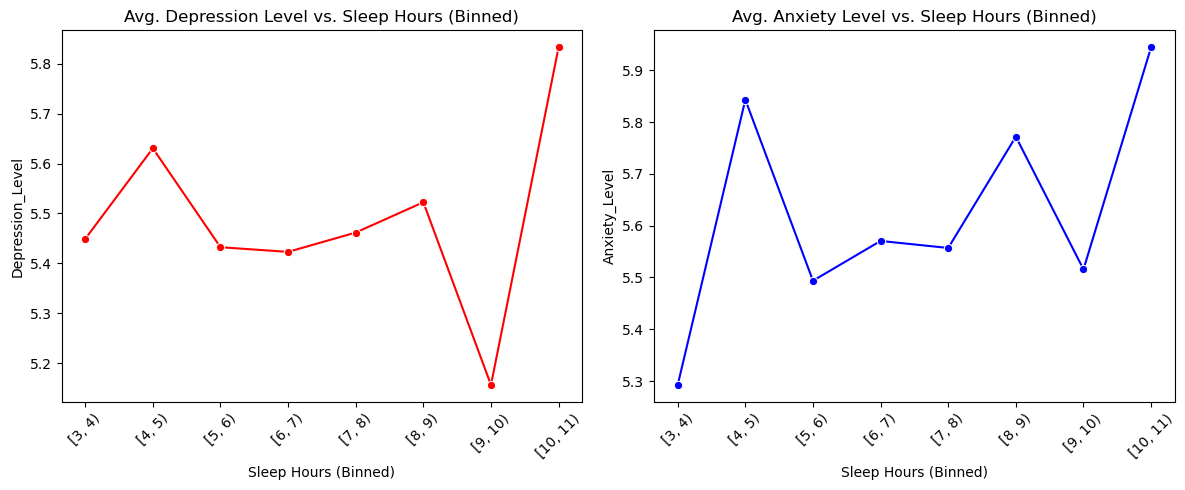

In [30]:
sleep_bins = pd.cut(df['Sleep_Hours'], bins=range(0, 13), right=False)
avg_stats = df.groupby(sleep_bins, observed=True)[['Depression_Level', 'Anxiety_Level']].mean().reset_index()
avg_stats['Sleep_Hours_Bin'] = avg_stats['Sleep_Hours'].astype(str)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.lineplot(data=avg_stats, x='Sleep_Hours_Bin', y='Depression_Level', marker='o', color='red')
plt.title("Avg. Depression Level vs. Sleep Hours (Binned)")
plt.xlabel("Sleep Hours (Binned)")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.lineplot(data=avg_stats, x='Sleep_Hours_Bin', y='Anxiety_Level', marker='o', color='blue')
plt.title("Avg. Anxiety Level vs. Sleep Hours (Binned)")
plt.xlabel("Sleep Hours (Binned)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [31]:
bins_usage_academic = [0, 2, 4, 6, 8, 10, df['Daily_Usage_Hours'].max()]
labels_usage_academic = ['<2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs', '10+ hrs']
df['usage_bucket_academic'] = pd.cut(
    df['Daily_Usage_Hours'],
    bins=bins_usage_academic,
    labels=labels_usage_academic,
    include_lowest=True
)

avg_academic_by_usage = (
    df.groupby('usage_bucket_academic', observed=True)['Academic_Performance']
      .mean()
      .reset_index()
)

print("Average Academic Performance by Daily Phone Usage Bucket:\n")
print(avg_academic_by_usage.to_string(index=False))
#Barring 10+hours(with less data) we can see that academic performance decreases with more phone usage.

Average Academic Performance by Daily Phone Usage Bucket:

usage_bucket_academic  Academic_Performance
               <2 hrs             73.160622
              2–4 hrs             74.710927
              4–6 hrs             75.504281
              6–8 hrs             74.936111
             8–10 hrs             73.893258
              10+ hrs             78.333333


In [32]:
max_usage = df['Daily_Usage_Hours'].max()
bins = [0, 2, 4, 6, 8, 10]
labels = ['<2', '2–4', '4–6', '6–8', '8–10']

if max_usage > 10:
    bins.append(max_usage + 0.01)  # ensure the max value falls into the last bin
    labels.append('10+')

df['usage_bucket_academic'] = pd.cut(
    df['Daily_Usage_Hours'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True, 
    right=True  # default: (a, b]
)

In [33]:
usage_10plus = df[df['usage_bucket_academic'] == '10+']

purpose_distribution_10plus = usage_10plus['Phone_Usage_Purpose'].value_counts(normalize=True) * 100

print("\n Phone Usage Purpose distribution for 10+ Hours users (%):")
print(purpose_distribution_10plus.round(2).to_string())


 Phone Usage Purpose distribution for 10+ Hours users (%):
Phone_Usage_Purpose
Browsing        44.44
Other           22.22
Social Media    16.67
Gaming          11.11
Education        5.56


In [34]:
print("Max Daily Usage Hours:", df['Daily_Usage_Hours'].max())

Max Daily Usage Hours: 11.5


In [35]:
high_perf_low_gaming = df[(df['Academic_Performance'] > 80) & (df['Time_on_Gaming'] < 2)]
percent_high_perf_low_gaming = (len(high_perf_low_gaming) / len(df)) * 100
print(f"Percentage of Students scoring >80 with <2hrs Gaming: {percent_high_perf_low_gaming:.2f}%")

Percentage of Students scoring >80 with <2hrs Gaming: 27.17%


In [36]:
lowest_acad_perf = df['Academic_Performance'].min()
print(f"Lowest Academic Performance: {lowest_acad_perf}")

Lowest Academic Performance: 50


In [185]:
low_perf_students = df[df['Academic_Performance'] < 60]

avg_gaming_time_low_perf = low_perf_students['Time_on_Gaming'].mean()

print(f"Average Gaming Time for Students with Academic Performance < 60: {avg_gaming_time_low_perf:.2f} hours")

Average Gaming Time for Students with Academic Performance < 60: 1.58 hours


In [191]:
avg_education_time_low_perf = low_perf_students['Time_on_Education'].mean()

print(f"Average Education Time for Students with Academic Performance < 60: {avg_education_time_low_perf:.2f} hours")

Average Education Time for Students with Academic Performance < 60: 1.03 hours


In [183]:
high_perf_students = df[df['Academic_Performance'] > 90]

avg_gaming_time_high_perf = high_perf_students['Time_on_Gaming'].mean()

print(f"Average Gaming Time for Students with Academic Performance > 90: {avg_gaming_time_high_perf:.2f} hours")

Average Gaming Time for Students with Academic Performance > 90: 1.47 hours


In [193]:
avg_education_time_high_perf = high_perf_students['Time_on_Education'].mean()

print(f"Average Education Time for Students with Academic Performance > 90: {avg_education_time_high_perf:.2f} hours")
#Students with better academic performance tends to spend less time playing games.

Average Education Time for Students with Academic Performance > 90: 1.04 hours


In [39]:
overall_academic_performance = df['Academic_Performance'].mean()
print(f"Overall Academic Performance (Mean): {overall_academic_performance:.2f}")

Overall Academic Performance (Mean): 74.95


In [40]:
bins_gaming_static = [0, 1, 2, 3, 4, 5, 6, 8, 10, 20]
labels_gaming_static = ['0–1', '1–2', '2–3', '3–4', '4–5', '5–6', '6–8', '8–10', '10+']

df['gaming_time_bucket'] = pd.cut(df['Time_on_Gaming'], bins=bins_gaming_static, labels=labels_gaming_static, include_lowest=True)

avg_academic_by_gaming_static = df.groupby('gaming_time_bucket', observed=False)['Academic_Performance'].mean().reset_index()

drop_below_75_static = avg_academic_by_gaming_static[avg_academic_by_gaming_static['Academic_Performance'] < 75]
print("Gaming time buckets where academic score < 75:")
print(drop_below_75_static)
#More than 2 hour of gameplay/day =>Lower performance than average.

Gaming time buckets where academic score < 75:
  gaming_time_bucket  Academic_Performance
2                2–3             74.509658
3                3–4             73.010526


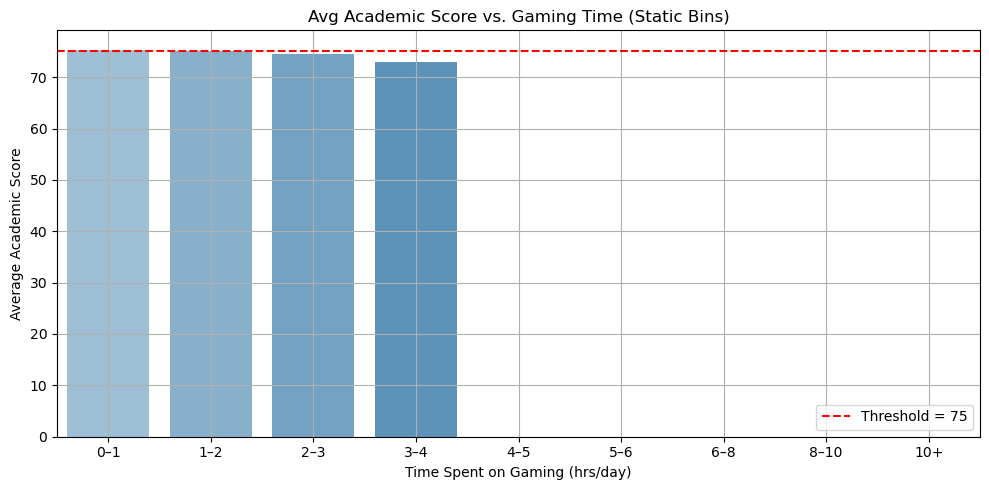

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=avg_academic_by_gaming_static,x='gaming_time_bucket',y='Academic_Performance',hue='gaming_time_bucket',palette='Blues_d',legend=False                    
)

plt.axhline(75, color='red', linestyle='--', label='Threshold = 75')
plt.title("Avg Academic Score vs. Gaming Time (Static Bins)")
plt.xlabel("Time Spent on Gaming (hrs/day)")
plt.ylabel("Average Academic Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
min_screen_time = df['Screen_Time_Before_Bed'].min()
max_screen_time = df['Screen_Time_Before_Bed'].max()

print(f"Minimum Screen Time Before Bed: {min_screen_time} hours")
print(f"Maximum Screen Time Before Bed: {max_screen_time} hours")

Minimum Screen Time Before Bed: 0.0 hours
Maximum Screen Time Before Bed: 2.6 hours


In [43]:
bottom_10_percentile = df['Academic_Performance'].quantile(0.10)

bottom_10_df = df[df['Academic_Performance'] <= bottom_10_percentile]

avg_screen_time = bottom_10_df['Screen_Time_Before_Bed'].mean()

print(f"Bottom 10% Academic Performers - Average Screen Time Before Bed: {avg_screen_time:.2f} hrs")

Bottom 10% Academic Performers - Average Screen Time Before Bed: 0.99 hrs


In [44]:
top_10_percentile = df['Academic_Performance'].quantile(0.90)

top_10_df = df[df['Academic_Performance'] >= top_10_percentile]

avg_screen_time = top_10_df['Screen_Time_Before_Bed'].mean()

print(f"Top 10% Academic Performers - Average Screen Time Before Bed: {avg_screen_time:.2f} hrs")

Top 10% Academic Performers - Average Screen Time Before Bed: 0.99 hrs


In [45]:
corr_screen_bed_vs_academic = df['Screen_Time_Before_Bed'].corr(df['Academic_Performance'])
print(f"Correlation (Screen Time Before Bed vs. Academic Performance): {corr_screen_bed_vs_academic:.3f}")

Correlation (Screen Time Before Bed vs. Academic Performance): -0.006


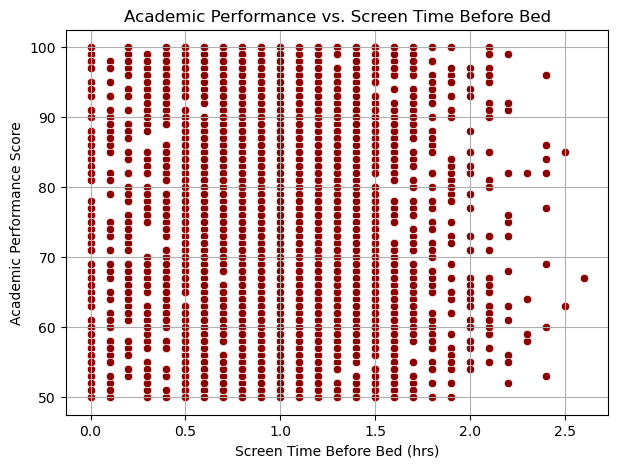

In [46]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Screen_Time_Before_Bed', y='Academic_Performance', color='darkred')
plt.title("Academic Performance vs. Screen Time Before Bed")
plt.xlabel("Screen Time Before Bed (hrs)")
plt.ylabel("Academic Performance Score")
plt.grid(True)
plt.show()

In [47]:
top_10_threshold = df['Academic_Performance'].quantile(0.90)
bottom_10_threshold = df['Academic_Performance'].quantile(0.10)

top_10 = df[df['Academic_Performance'] >= top_10_threshold]
bottom_10 = df[df['Academic_Performance'] <= bottom_10_threshold]

cols_to_compare = [
    'Daily_Usage_Hours',
    'Social_Interactions',
    'Depression_Level',
    'Self_Esteem',
    'Parental_Control',
    'Time_on_Education',
    'Phone_Checks_Per_Day',
    'Time_on_Gaming',
    'Time_on_Social_Media',
    'Addiction_Level'
]

top_10_means = top_10[cols_to_compare].mean()
bottom_10_means = bottom_10[cols_to_compare].mean()

comparison_df = pd.DataFrame({
    'Top 10%': top_10_means,
    'Bottom 10%': bottom_10_means
})

print("Mean Comparison for Top vs Bottom 10% Academic Performers:")
display(comparison_df)

Mean Comparison for Top vs Bottom 10% Academic Performers:


,Top 10%,Bottom 10%
Daily_Usage_Hours,5.167143,5.071848
Social_Interactions,5.057143,4.856305
Depression_Level,5.214286,5.513196
Self_Esteem,5.462857,5.765396
Parental_Control,0.520000,0.536657
Time_on_Education,1.064571,1.006158
Phone_Checks_Per_Day,80.965714,82.601173
Time_on_Gaming,1.444000,1.604106
Time_on_Social_Media,2.574857,2.418182
Addiction_Level,8.933429,8.912317


In [48]:
location_performance_usage = df.groupby('Location').agg({
    'Academic_Performance': 'mean',
    'Daily_Usage_Hours': 'mean'
}).reset_index()

location_performance_usage['edu_efficiency_score'] = location_performance_usage['Academic_Performance'] - location_performance_usage['Daily_Usage_Hours']

top_5_locations_balanced = location_performance_usage.sort_values('edu_efficiency_score', ascending=False).head(5)

print("Top 5 Locations with High Academic Performance & Low Usage:")
print(top_5_locations_balanced[['Location', 'Academic_Performance', 'Daily_Usage_Hours']])

Top 5 Locations with High Academic Performance & Low Usage:
              Location  Academic_Performance  Daily_Usage_Hours
909    Lake Ambershire                 100.0                0.6
2036      Richardville                 100.0                2.5
669           Hallland                 100.0                2.6
1233   Mcculloughville                 100.0                2.7
1636  North Kevinshire                  99.0                1.9


In [49]:
print(df.columns.tolist())

['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level', 'Usage_Category', 'Sleep_Deprived', 'usage_bucket_academic', 'gaming_time_bucket']


In [203]:
df['Addiction_Category'] = pd.cut(df['Addiction_Level'],
                                   bins=[2, 4, 6, 8],
                                   labels=['Low', 'Medium', 'High'])

avg_exercise_by_category = df.groupby('Addiction_Category',observed=True)['Exercise_Hours'].mean().reset_index()
print(avg_exercise_by_category)
#Highly addicted students tend to do less exercise.

  Addiction_Category  Exercise_Hours
0                Low        1.257895
1             Medium        1.106218
2               High        1.054739


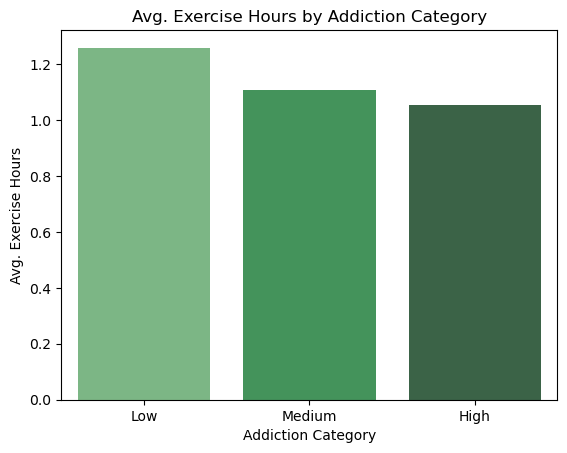

In [205]:
sns.barplot(data=avg_exercise_by_category, x='Addiction_Category', y='Exercise_Hours',hue='Addiction_Category',palette='Greens_d')
plt.title("Avg. Exercise Hours by Addiction Category")
plt.xlabel("Addiction Category")
plt.ylabel("Avg. Exercise Hours")
plt.show()

   Age  Family_Communication
0   13              5.357968
1   14              5.508197
2   15              5.468677
3   16              5.473233
4   17              5.694175
5   18              5.454768
6   19              5.266033


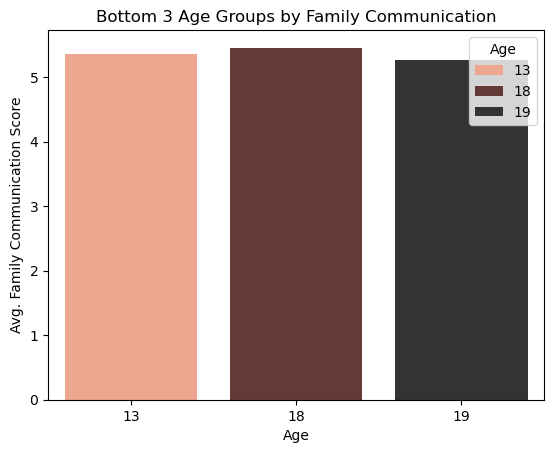

In [207]:
avg_comm = df.groupby('Age')['Family_Communication'].mean().reset_index()
print(avg_comm)
bottom3_ages = avg_comm.nsmallest(3, 'Family_Communication')

sns.barplot(data=bottom3_ages, x='Age', y='Family_Communication',hue='Age', palette='Reds_d')
plt.title("Bottom 3 Age Groups by Family Communication")
plt.xlabel("Age")
plt.ylabel("Avg. Family Communication Score")
plt.show()

In [53]:
min_self_esteem = df['Self_Esteem'].min()
max_self_esteem = df['Self_Esteem'].max()

print(f"Minimum Self Esteem: {min_self_esteem}")
print(f"Maximum Self Esteem: {max_self_esteem}")

Minimum Self Esteem: 1
Maximum Self Esteem: 10


In [54]:
good_sleep = df['Sleep_Hours'] >= 7
high_self_esteem = df['Self_Esteem'] >= 7  # you can adjust this threshold

wellness_group = df[good_sleep & high_self_esteem]

wellness_percent = (len(wellness_group) / len(df)) * 100
print(f"% of Students with ≥7hrs Sleep & High Self Esteem: {wellness_percent:.2f}%")

% of Students with ≥7hrs Sleep & High Self Esteem: 16.07%


In [55]:
df['Wellness'] = ((df['Sleep_Hours'] >= 7) & (df['Self_Esteem'] >= 7)).astype(int)

age_grouped = df.groupby('Age').agg(
    total_students=('Age', 'count'),
    wellness_students=('Wellness', 'sum')
)

age_grouped['Wellness_Percentage'] = (age_grouped['wellness_students'] / age_grouped['total_students']) * 100

print(age_grouped[['Wellness_Percentage']])

     Wellness_Percentage
Age                     
13             17.321016
14             14.285714
15             14.153132
16             16.488223
17             16.262136
18             17.603912
19             16.389549


In [56]:
df['High_Self_Esteem'] = (df['Self_Esteem'] >= 7).astype(int)

high_esteem_by_age = df.groupby('Age').agg(
    total_students=('Age', 'count'),
    high_esteem_students=('High_Self_Esteem', 'sum')
)

high_esteem_by_age['High_Self_Esteem_Percentage'] = (
    high_esteem_by_age['high_esteem_students'] / high_esteem_by_age['total_students']
) * 100

print(high_esteem_by_age[['High_Self_Esteem_Percentage']])

     High_Self_Esteem_Percentage
Age                             
13                     44.341801
14                     40.281030
15                     38.979118
16                     41.970021
17                     41.747573
18                     38.875306
19                     41.805226


In [57]:
df['Low_Self_Esteem'] = (df['Self_Esteem'] < 4).astype(int)

low_esteem_by_age = df.groupby('Age').agg(
    total_students=('Age', 'count'),
    low_esteem_students=('Low_Self_Esteem', 'sum')
)

low_esteem_by_age['Low_Self_Esteem_Percentage'] = (
    low_esteem_by_age['low_esteem_students'] / low_esteem_by_age['total_students']
) * 100

print(low_esteem_by_age[['Low_Self_Esteem_Percentage']])
#Generally as age is increasing % of children with low esteem is increasing.

     Low_Self_Esteem_Percentage
Age                            
13                    27.944573
14                    28.805621
15                    28.074246
16                    26.124197
17                    30.582524
18                    34.474328
19                    31.116390


In [58]:
esteem_perf_by_age = df.groupby('Age').agg(
    Avg_Self_Esteem=('Self_Esteem', 'mean'),
    Avg_Academic_Performance=('Academic_Performance', 'mean'),
    Count=('Age', 'count')
)

print(esteem_perf_by_age)

     Avg_Self_Esteem  Avg_Academic_Performance  Count
Age                                                  
13          5.743649                 74.886836    433
14          5.555035                 75.107728    427
15          5.531323                 73.967517    431
16          5.678801                 74.308351    467
17          5.529126                 75.208738    412
18          5.276284                 75.256724    409
19          5.482185                 76.002375    421


In [59]:
self_esteem_by_gender = df.groupby('Gender')['Self_Esteem'].mean()
avg_self_esteem=df['Self_Esteem'].mean()
print(avg_self_esteem)
print(self_esteem_by_gender)
#Children identifying as other gender have comparatively lower self_esteem.

5.546333333333333
Gender
Female    5.573982
Male      5.594488
Other     5.467758
Name: Self_Esteem, dtype: float64


In [60]:
df['Low_Self_Esteem'] = (df['Self_Esteem'] < 4).astype(int)

gender_low_esteem = df.groupby('Gender').agg(
    total_students=('Gender', 'count'),
    low_esteem_students=('Low_Self_Esteem', 'sum')
)

gender_low_esteem['Low_Self_Esteem_Percentage'] = (
    gender_low_esteem['low_esteem_students'] / gender_low_esteem['total_students']
) * 100

print(gender_low_esteem[['Low_Self_Esteem_Percentage']])

        Low_Self_Esteem_Percentage
Gender                            
Female                   28.897716
Male                     29.527559
Other                    30.092119


In [61]:
phone_usage_by_gender = df.groupby('Gender')['Daily_Usage_Hours'].mean().round(2)

print(phone_usage_by_gender)

Gender
Female    5.05
Male      5.05
Other     4.95
Name: Daily_Usage_Hours, dtype: float64


In [62]:
acad_perf_by_gender = df.groupby('Gender')['Academic_Performance'].mean().round(2)

print(acad_perf_by_gender)

Gender
Female    74.70
Male      74.71
Other     75.45
Name: Academic_Performance, dtype: float64


In [63]:
social_interaction_by_gender = df.groupby('Gender')['Social_Interactions'].mean().round(2)

print(social_interaction_by_gender)

Gender
Female    5.11
Male      5.10
Other     5.08
Name: Social_Interactions, dtype: float64


In [64]:
mean_social_interaction = df['Social_Interactions'].mean()
print(f"Mean Social Interaction: {mean_social_interaction:.2f} hours")
#We can see children identifying as other gender have lower social interaction than average.

Mean Social Interaction: 5.10 hours


In [65]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level', 'Usage_Category', 'Sleep_Deprived',
       'usage_bucket_academic', 'gaming_time_bucket', 'Addiction_Category',
       'Wellness', 'High_Self_Esteem', 'Low_Self_Esteem'],
      dtype='object')

In [66]:
df['Age_Group'] = pd.Categorical(df['Age'], categories=sorted(df['Age'].unique()), ordered=True)
avg_addiction_by_age = df.groupby('Age_Group',observed=True)['Addiction_Level'].mean().sort_index()
print(avg_addiction_by_age)

Age_Group
13    8.764896
14    8.829274
15    8.878654
16    8.941328
17    8.899757
18    8.938875
19    8.920190
Name: Addiction_Level, dtype: float64


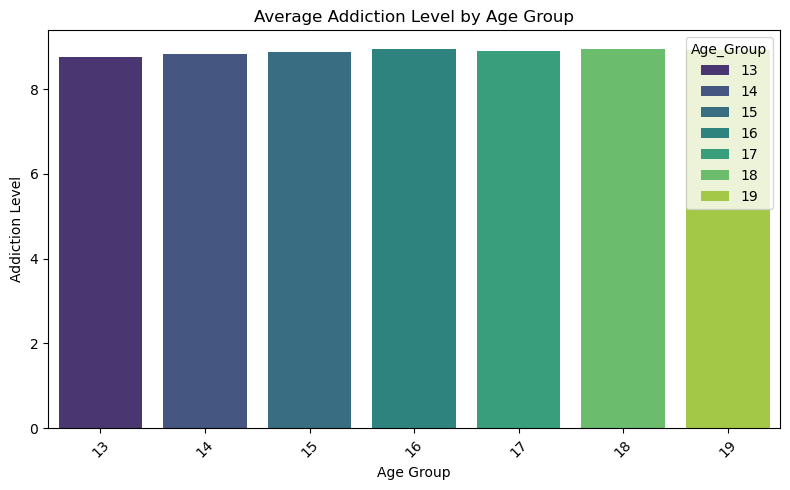

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Age_Group', y='Addiction_Level',hue='Age_Group', estimator='mean', errorbar=None, palette='viridis')
plt.title("Average Addiction Level by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Addiction Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
avg_checks_by_purpose = df.groupby('Phone_Usage_Purpose')['Phone_Checks_Per_Day'].mean().sort_values(ascending=False)
print(avg_checks_by_purpose)

Phone_Usage_Purpose
Other           84.715434
Social Media    84.314783
Gaming          83.179443
Education       81.890365
Browsing        81.438596
Name: Phone_Checks_Per_Day, dtype: float64


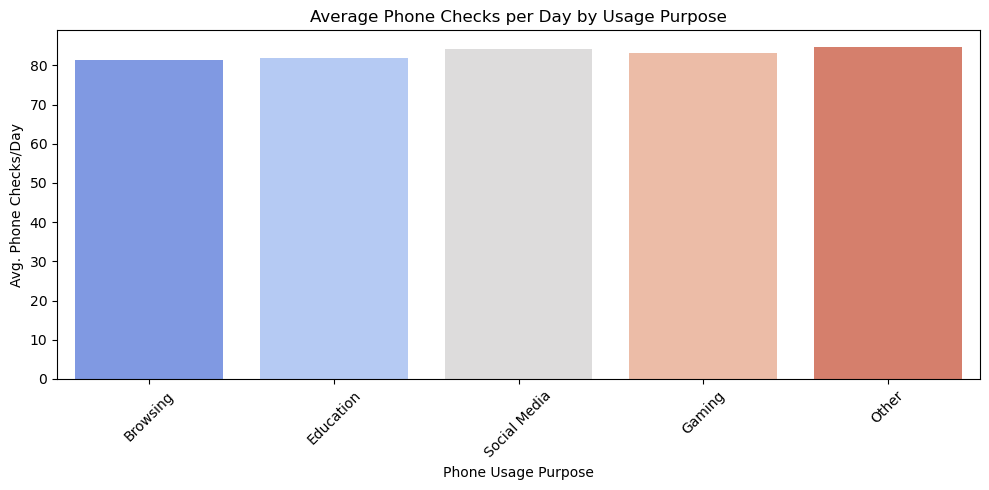

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Phone_Usage_Purpose', y='Phone_Checks_Per_Day',hue='Phone_Usage_Purpose', estimator='mean', errorbar=None, palette='coolwarm')
plt.title("Average Phone Checks per Day by Usage Purpose")
plt.xlabel("Phone Usage Purpose")
plt.ylabel("Avg. Phone Checks/Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

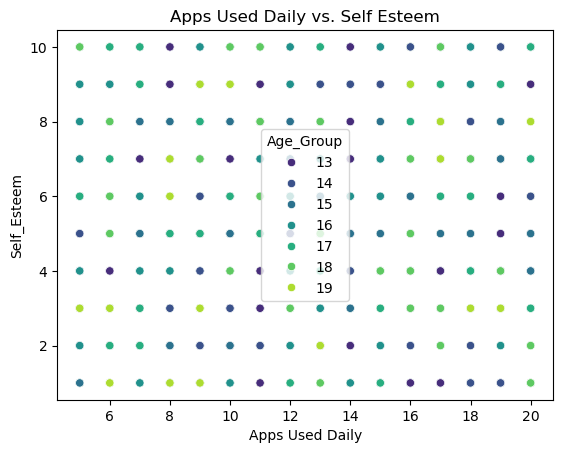

Correlation between Apps Used Daily and Self Esteem: -0.03


In [70]:
sns.scatterplot(data=df, x='Apps_Used_Daily', y='Self_Esteem', hue='Age_Group', palette='viridis')
plt.title("Apps Used Daily vs. Self Esteem")
plt.xlabel("Apps Used Daily")
plt.ylabel("Self_Esteem")
plt.show()

correlation = df[['Apps_Used_Daily', 'Self_Esteem']].corr().iloc[0,1]
print(f"Correlation between Apps Used Daily and Self Esteem: {correlation:.2f}")

In [71]:
df['Estimated_Weekday_Usage'] = (df['Daily_Usage_Hours'] * 7 - df['Weekend_Usage_Hours'] * 2) / 5
df['Weekend_vs_Weekday_Diff'] = df['Weekend_Usage_Hours'] - df['Estimated_Weekday_Usage']

avg_diff = df['Weekend_vs_Weekday_Diff'].mean()
print(f"Average Weekend - Weekday Usage Difference: {avg_diff:.2f} hours")
#Children are using phones more on weekends.

Average Weekend - Weekday Usage Difference: 1.39 hours


In [72]:
df['Estimated_Weekday_Usage'] = (df['Daily_Usage_Hours'] * 7 - df['Weekend_Usage_Hours'] * 2) / 5
df['Weekend_vs_Weekday_Diff'] = df['Weekend_Usage_Hours'] - df['Estimated_Weekday_Usage']

age_diff = df.groupby('Age')['Weekend_vs_Weekday_Diff'].mean().reset_index()

age_diff.columns = ['Age', 'Avg_Weekend_vs_Weekday_Diff']

print(age_diff)

   Age  Avg_Weekend_vs_Weekday_Diff
0   13                     1.505404
1   14                     1.645902
2   15                     1.380510
3   16                     1.240814
4   17                     1.496505
5   18                     1.217213
6   19                     1.266318


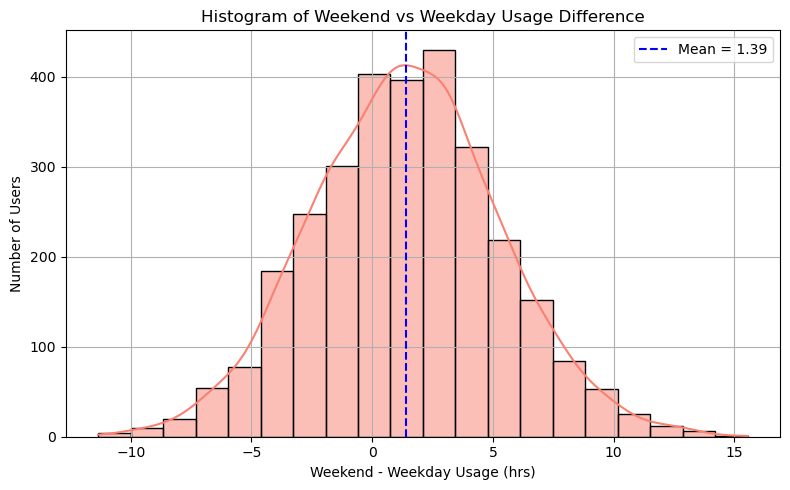

In [73]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weekend_vs_Weekday_Diff'], kde=True, bins=20, color='salmon')
plt.title("Histogram of Weekend vs Weekday Usage Difference")
plt.xlabel("Weekend - Weekday Usage (hrs)")
plt.ylabel("Number of Users")
plt.axvline(df['Weekend_vs_Weekday_Diff'].mean(), color='blue', linestyle='--', label=f"Mean = {df['Weekend_vs_Weekday_Diff'].mean():.2f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [181]:
top_cities = df.groupby('Location')['Daily_Usage_Hours'].mean().sort_values(ascending=False).head(5)
print("Top 5 Cities with Highest Average Screen Time:")
print(top_cities)

Top 5 Cities with Highest Average Screen Time:
Location
North Julieland    11.5
Deborahmouth       11.2
North Henryfort    11.0
Derrickville       11.0
Fordtown           10.9
Name: Daily_Usage_Hours, dtype: float64


In [75]:
avg_usage_by_parental_control = df.groupby('Parental_Control')['Daily_Usage_Hours'].mean().reset_index()

print(avg_usage_by_parental_control)
#Surprisingly parental control does not make a huge difference in daily usage hours.

   Parental_Control  Daily_Usage_Hours
0                 0           5.018742
1                 1           5.022536


In [76]:
family_comm_by_addiction = df.groupby('Addiction_Level')['Family_Communication'].mean().reset_index()

print(family_comm_by_addiction)

    Addiction_Level  Family_Communication
0               1.0              6.000000
1               1.4              2.000000
2               2.0              8.000000
3               2.1              6.000000
4               2.2              4.000000
..              ...                   ...
75              9.6              5.021739
76              9.7              5.297297
77              9.8              5.250000
78              9.9              5.020000
79             10.0              5.483596

[80 rows x 2 columns]


In [77]:
min_val = family_comm_by_addiction['Family_Communication'].min()
max_val = family_comm_by_addiction['Family_Communication'].max()
range_val = max_val - min_val

print(f"Min Avg. Family Communication: {min_val:.2f}")
print(f"Max Avg. Family Communication: {max_val:.2f}")
print(f"Range: {range_val:.2f}")

Min Avg. Family Communication: 1.00
Max Avg. Family Communication: 8.50
Range: 7.50


In [165]:
family_comm_by_addiction = df.groupby('Addiction_Level')['Family_Communication'].mean().sort_values(ascending=False)

print("Family Communication by Addiction Level:")
print(family_comm_by_addiction)

top = family_comm_by_addiction.head(10)
print("\nTop Addiction Levels with Highest Family Communication:")
print(top)

bottom = family_comm_by_addiction.tail(10)
print("\nBottom Addiction Levels with Lowest Family Communication:")
print(bottom)

Family Communication by Addiction Level:
Addiction_Level
3.2    8.500000
3.8    8.166667
3.5    8.000000
2.0    8.000000
3.4    8.000000
         ...   
2.2    4.000000
5.3    3.222222
3.9    2.000000
1.4    2.000000
2.4    1.000000
Name: Family_Communication, Length: 80, dtype: float64

Top 3 Addiction Levels with Highest Family Communication:
Addiction_Level
3.2    8.500000
3.8    8.166667
3.5    8.000000
2.0    8.000000
3.4    8.000000
5.4    7.533333
4.8    7.400000
4.0    7.000000
3.0    7.000000
5.5    6.916667
Name: Family_Communication, dtype: float64

Bottom 3 Addiction Levels with Lowest Family Communication:
Addiction_Level
4.4    4.571429
6.2    4.521739
4.3    4.000000
4.2    4.000000
4.1    4.000000
2.2    4.000000
5.3    3.222222
3.9    2.000000
1.4    2.000000
2.4    1.000000
Name: Family_Communication, dtype: float64


In [78]:
top = family_comm_by_addiction.sort_values(by='Family_Communication', ascending=False).head(3)
bottom = family_comm_by_addiction.sort_values(by='Family_Communication').head(3)

print("Top 3 Addiction Levels with Highest Family Communication:")
print(top)

print("\nBottom 3 Addiction Levels with Lowest Family Communication:")
print(bottom)

Top 3 Addiction Levels with Highest Family Communication:
    Addiction_Level  Family_Communication
11              3.2              8.500000
17              3.8              8.166667
14              3.5              8.000000

Bottom 3 Addiction Levels with Lowest Family Communication:
    Addiction_Level  Family_Communication
6               2.4                   1.0
1               1.4                   2.0
18              3.9                   2.0


In [79]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level', 'Usage_Category', 'Sleep_Deprived',
       'usage_bucket_academic', 'gaming_time_bucket', 'Addiction_Category',
       'Wellness', 'High_Self_Esteem', 'Low_Self_Esteem', 'Age_Group',
       'Estimated_Weekday_Usage', 'Weekend_vs_Weekday_Diff'],
      dtype='object')

In [80]:
stack_data = df.groupby(['Age_Group', 'Phone_Usage_Purpose'], observed=False).size().unstack().fillna(0)

print("Phone Usage Purpose Count by Age Group:")
print(stack_data.astype(int))
#Education increased at the age of 18-19 because of end of high school/start of college.
#At age 15 there is surge in gaming.
#Browsing remains common usage purpose across all ages.

Phone Usage Purpose Count by Age Group:
Phone_Usage_Purpose  Browsing  Education  Gaming  Other  Social Media
Age_Group                                                            
13                         99         87      80     93            74
14                        100         82      77     81            87
15                         83         71      96     93            88
16                        102         98      80    103            84
17                         82         74      87     89            80
18                         74        100      67     79            89
19                         87         90      87     84            73


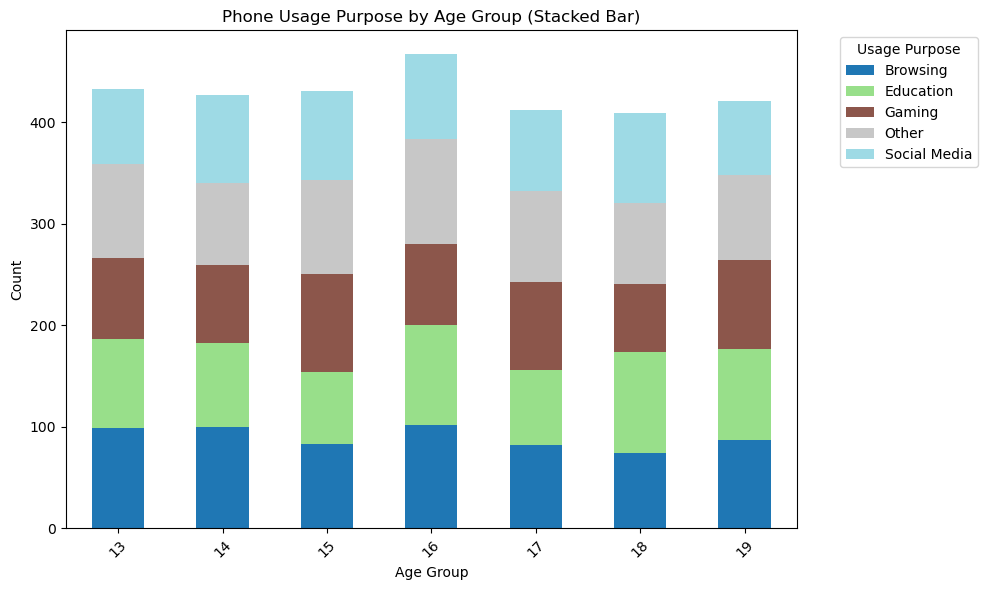

In [81]:
stack_data = df.groupby(['Age_Group', 'Phone_Usage_Purpose'],observed=False).size().unstack().fillna(0)

stack_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Phone Usage Purpose by Age Group (Stacked Bar)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Usage Purpose", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 

In [82]:
df['Social_Group'] = pd.cut(df['Social_Interactions'], bins=[-1, 2, 5, 8, 10], 
                            labels=['Low', 'Medium', 'High', 'Very High'])

avg_addiction_by_social = df.groupby('Social_Group',observed=True)['Addiction_Level'].mean()
print("Average Addiction Level by Social Interaction Group:\n", avg_addiction_by_social)

Average Addiction Level by Social Interaction Group:
 Social_Group
Low          8.933118
Medium       8.821723
High         8.918837
Very High    8.841805
Name: Addiction_Level, dtype: float64


In [83]:
correlation = df['Social_Interactions'].corr(df['Addiction_Level'])
print(f"Correlation between Social Interactions and Addiction Level: {correlation:.2f}")

Correlation between Social Interactions and Addiction Level: -0.01


In [84]:
df['Depression_Group'] = pd.cut(df['Depression_Level'], bins=[-1, 3, 6, 8, 10],
                                 labels=['Low', 'Moderate', 'High', 'Severe'])

avg_addiction_by_depression = df.groupby('Depression_Group',observed=True)['Addiction_Level'].mean()
print(" Average Addiction Level by Depression Group:\n", avg_addiction_by_depression)
#We can see children with severe depression are also more addicted.

 Average Addiction Level by Depression Group:
 Depression_Group
Low         8.846317
Moderate    8.948443
High        8.738448
Severe      8.971501
Name: Addiction_Level, dtype: float64


In [85]:
df['Interaction_Group'] = pd.cut(df['Social_Interactions'],
                                  bins=[-1, 3, 6, 10],
                                  labels=['Low', 'Moderate', 'High'])
 
avg_depression = df.groupby('Interaction_Group',observed=True)['Depression_Level'].mean()
print("Avg Depression by Interaction Group:\n", avg_depression)
#We can see depression is more for children with low social interactions.

Avg Depression by Interaction Group:
 Interaction_Group
Low         5.390010
Moderate    5.424789
High        5.551418
Name: Depression_Level, dtype: float64


In [86]:
avg_depression_age = df.groupby('Age_Group',observed=True)['Depression_Level'].mean().sort_index()
print(" Avg Depression by Age Group:\n", avg_depression_age)
#We can see children in young age group of 13-15 are more prone to depression.

 Avg Depression by Age Group:
 Age_Group
13    5.004619
14    5.384075
15    5.761021
16    5.351178
17    5.366505
18    5.841076
19    5.541568
Name: Depression_Level, dtype: float64
